In [ ]:
#importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indian_liver_patient.csv to indian_liver_patient.csv


In [ ]:
#Read the Dataset

In [ ]:
data=pd.read_csv("indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#Handling Missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
#Handling categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Gender'] = lc.fit_transform(data['Gender']) 

In [ ]:
#Descriptive Analysis

In [ ]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
#Visual Analysis
#Univariate analysis

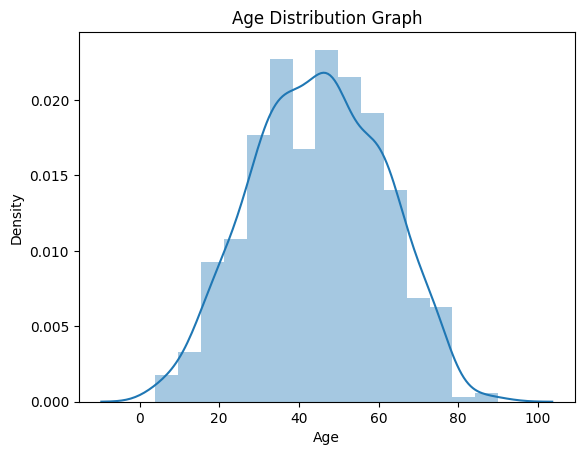

In [ ]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

<Axes: xlabel='Dataset', ylabel='count'>

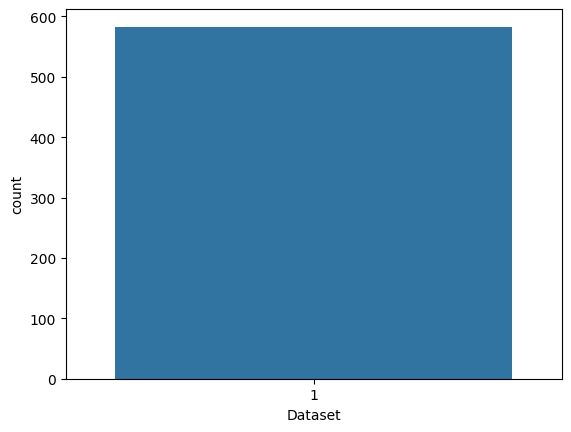

In [ ]:
sns.countplot(data['Dataset'],x=data['Gender'])

<Axes: >

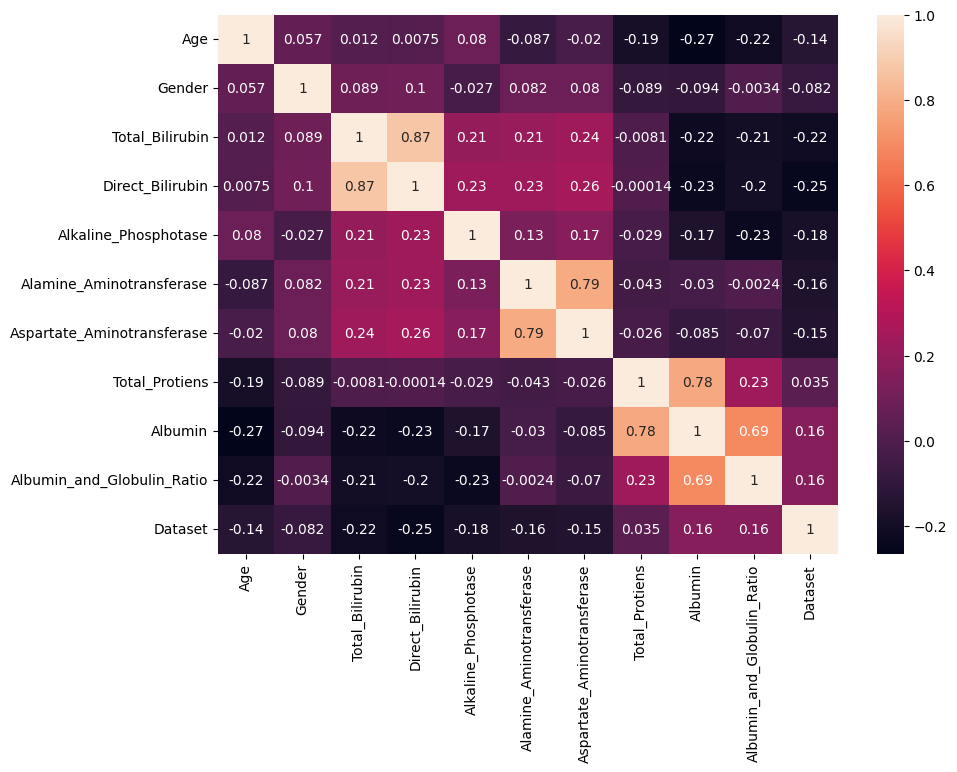

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [ ]:
#scaling the data

In [ ]:
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame (scale(x),columns=x.columns)
x_scaled.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237


In [ ]:
x=data.iloc[:,:-1]
y=data.Dataset


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Handling imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Model Building

In [ ]:
svm=SVC()
RFmodel=RandomForestClassifier()
KNmodel=KNeighborsClassifier()

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
RFaccuracy=accuracy_score(RFpred,y_test)
RFaccuracy

0.7521367521367521

In [ ]:
RFcm=confusion_matrix(RFpred,y_test)
RFcm

array([[75, 17],
       [12, 13]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [ ]:
KNNpred=KNN.predict(x_test)

In [ ]:
KNNpred=KNN.predict(x_test)

In [ ]:
KNNaccuracy=accuracy_score(KNNpred,y_test)
KNNaccuracy

     0.6837606837606838

In [ ]:
KNNcm=confusion_matrix(KNNpred,y_test)
KNNcm

array([[69, 19],
       [18, 11]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()

In [ ]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
DTCpred=DTC.predict(x_test)

In [ ]:
DTCaccuracy=accuracy_score(DTCpred,y_test)
DTCaccuracy

0.717948717948718

In [ ]:
DTCcm=confusion_matrix(DTCpred,y_test)
DTCcm

array([[66, 12],
       [21, 18]])

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
LRpred=LR.predict(x_test)

In [ ]:
LRaccuracy=accuracy_score(LRpred,y_test)
LRaccuracy

0.7435897435897436

In [ ]:
LRcm=confusion_matrix(LRpred,y_test)
LRcm

array([[82, 25],
       [ 5,  5]])

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=100,activation='relu',input_dim=10))

In [ ]:
classifier.add(Dense(units=50,activation='relu'))

In [ ]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
RFmodel_history=classifier.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 80ms/step - loss: -658367.8125 - accuracy: 0.7016 - val_loss: -593204.0625 - val_accuracy: 0.7234
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: -667815.0000 - accuracy: 0.7016 - val_loss: -601997.3125 - val_accuracy: 0.7234
Epoch 3/100
4/4 [==============================] - 0s 53ms/step - loss: -677944.8750 - accuracy: 0.7016 - val_loss: -610722.8125 - val_accuracy: 0.7234
Epoch 4/100
4/4 [==============================] - 0s 51ms/step - loss: -687855.5625 - accuracy: 0.7016 - val_loss: -619532.7500 - val_accuracy: 0.7234
Epoch 5/100
4/4 [==============================] - 0s 43ms/step - loss: -697299.9375 - accuracy: 0.7016 - val_loss: -628574.0000 - val_accuracy: 0.7234
Epoch 6/100
4/4 [==============================] - 0s 41ms/step - loss: -707700.5000 - accuracy: 0.7016 - val_loss: -637505.2500 - val_accuracy: 0.7234
Epoch 7/100
4/4 [==============================] - 0s 41ms/step - loss: -717873.1875 - a

In [ ]:
#Testing the model

In [ ]:
DTC.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([2])

In [ ]:
RFmodel.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [ ]:
classifier.save("liver.h5")

In [ ]:
y_test =(y_test>0.5)
y_test

355    True
407    True
90     True
402    True
268    True
       ... 
516    True
305    True
167    True
312    True
329    True
Name: Dataset, Length: 117, dtype: bool

In [ ]:
def predict_exit(sample_value):
  sample_value =np.array(sample_value)
  sample_value =sample_value.reshape(1,-1)
  sample_value =scale(sample_value)
  return classifier.predict(sample_value)

In [ ]:
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
  print('Prediction: Liver Patient')
else:
  print('Prediction: Healthy')

1/1 [==============================] - 0s 105ms/step
Prediction: Liver Patient
1/1 [==============================] - 0s 24ms/step
Prediction: Liver Patient


In [ ]:
#performance Testing& Hyperparameter tuning

In [ ]:
acc_smote=[['KNN Classifier',KNN],['RandomForestClassifier',RFaccuracy],['DecisionTreeClassifier',DTCaccuracy],['LogisticRegression',LRaccuracy]]
Liverpatient_pred=pd.DataFrame(acc_smote,columns=['classification models','accuracy_score'])
Liverpatient_pred

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models",y="accuracy_score",data=Liverpatient_pred,palette="Set2")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model1=ExtraTreesClassifier()
model1.fit(x,y)

In [ ]:
RFmodel.feature_importances_

In [ ]:
dd=pd.DataFrame(RFmodel.feature_importances_,index=x.columns).sort_values(0,ascending=False)
dd

Text(0.5, 1.0, 'FEATURE IMPORTANCE')

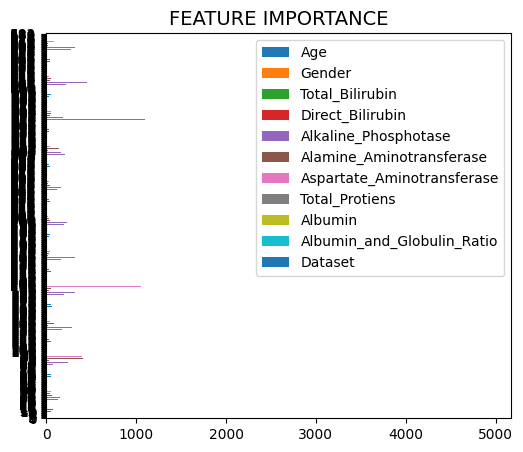

In [ ]:
data.plot(kind='barh',figsize=(6,5))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [ ]:
#Model Deployment

In [ ]:
import joblib
joblib.dump(RFmodel,'liver_analysis_1.pkl')

['liver_analysis_1.pkl']